In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [24]:
data = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [26]:
X_columns = df.columns.tolist()[2:12]
y_columns = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print(f'X values: {X_columns}')
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
y values: ['Exited']


In [27]:
X = df[X_columns].values 
y = df[y_columns].values 

In [28]:
print("Original:", X[:8,1])
from sklearn.preprocessing import LabelEncoder

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print("Encoded: " ,X[:8,1])

Original: ['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany']
Encoded:  [0 2 0 0 2 2 0 1]


In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [30]:
X = pipeline.fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [32]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()

In [34]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [35]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

In [36]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [37]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [38]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [39]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200


2022-11-20 22:26:01.782808: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


225/225 - 0s - loss: 0.5525 - accuracy: 0.7718 - val_loss: 0.4836 - val_accuracy: 0.7950 - 446ms/epoch - 2ms/step
Epoch 2/200
225/225 - 0s - loss: 0.4777 - accuracy: 0.7965 - val_loss: 0.4535 - val_accuracy: 0.7950 - 84ms/epoch - 375us/step
Epoch 3/200
225/225 - 0s - loss: 0.4625 - accuracy: 0.7961 - val_loss: 0.4401 - val_accuracy: 0.7937 - 83ms/epoch - 370us/step
Epoch 4/200
225/225 - 0s - loss: 0.4528 - accuracy: 0.8033 - val_loss: 0.4291 - val_accuracy: 0.8087 - 82ms/epoch - 366us/step
Epoch 5/200
225/225 - 0s - loss: 0.4441 - accuracy: 0.8044 - val_loss: 0.4199 - val_accuracy: 0.8238 - 82ms/epoch - 363us/step
Epoch 6/200
225/225 - 0s - loss: 0.4365 - accuracy: 0.8111 - val_loss: 0.4124 - val_accuracy: 0.8263 - 83ms/epoch - 370us/step
Epoch 7/200
225/225 - 0s - loss: 0.4312 - accuracy: 0.8099 - val_loss: 0.4046 - val_accuracy: 0.8263 - 87ms/epoch - 388us/step
Epoch 8/200
225/225 - 0s - loss: 0.4265 - accuracy: 0.8106 - val_loss: 0.3975 - val_accuracy: 0.8300 - 96ms/epoch - 425us/st

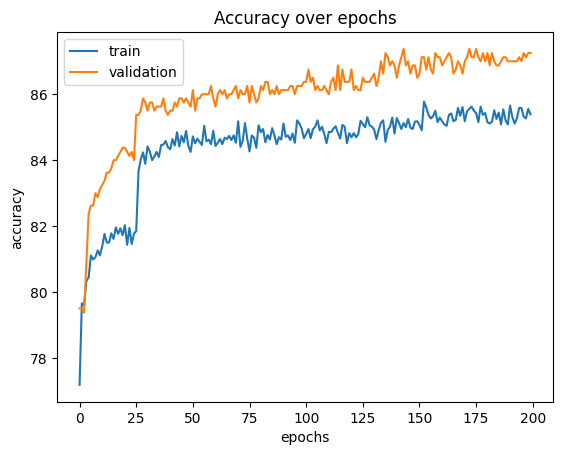

In [40]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [41]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 441us/step
[[0.31052956]
 [0.23566288]
 [0.17429423]
 [0.08043361]
 [0.12516691]]


In [42]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1530,   65],
       [ 195,  210]])

In [44]:
print(((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

87.0 % of testing data was classified correctly
